In [1]:
import os
from pathlib import Path

CUR_DIR = Path(os.getcwd())
DATASET_DIR = CUR_DIR / Path("data")
RAW_FILE = DATASET_DIR / Path("raw") / Path("diabetes.csv")

In [2]:
import pandas as pd
import numpy as np

raw = pd.read_csv(RAW_FILE)
raw.iloc[:,-1].replace(0,-1, inplace = True) # sign labels
raw.to_csv(DATASET_DIR / "raw.csv",index=False)
raw.replace(0,np.nan, inplace = True)
raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,-1
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,-1
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: ylabel='Frequency'>

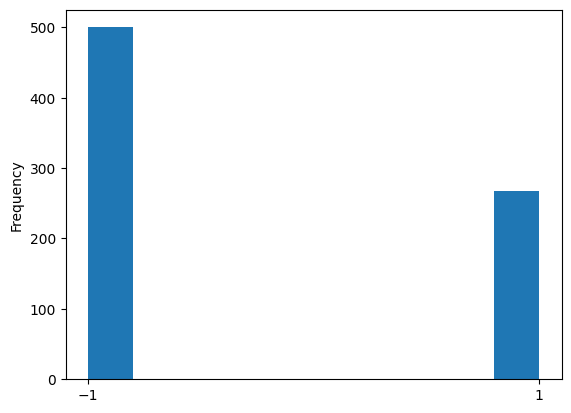

In [3]:
labels = raw[raw.columns.values[-1]]
labels.plot(kind="hist", xticks=[-1,1])

In [4]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,657.0,4.494673,3.217291,1.000,2.00000,4.0000,7.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,-0.302083,0.953903,-1.000,-1.00000,-1.0000,1.00000,1.00


<Axes: >

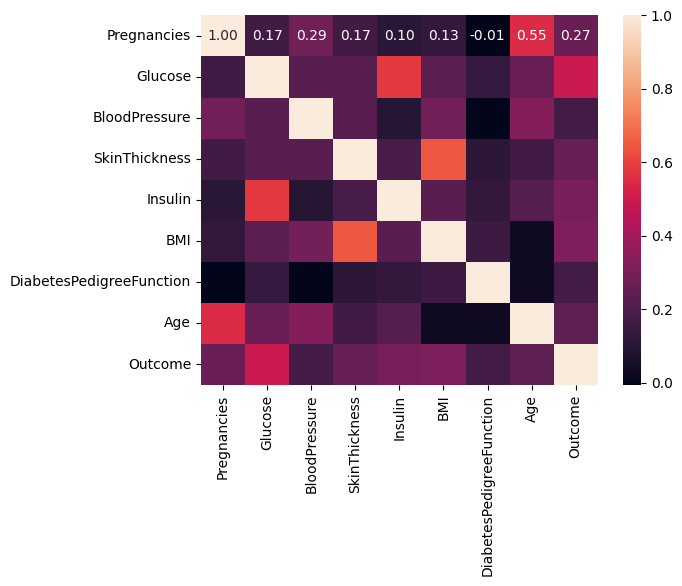

In [5]:
import seaborn as sns

sns.heatmap(raw.corr(),annot=True, fmt=".2f")

In [6]:
std_df = pd.DataFrame()
norm_df = pd.DataFrame()
for col, data in raw.items():
    if col == raw.columns.values[-1]:
        break
    _min = data.min()
    _max = data.max()
    _mean = data.mean()
    _std = data.std()
    std_df[col] = (2*(data.values - _min) / (_max-_min))-1
    norm_df[col] = (data.values - _mean) / _std
std_df[raw.columns.values[-1]]=raw[raw.columns.values[-1]]
norm_df[raw.columns.values[-1]]=raw[raw.columns.values[-1]]

In [7]:
std_df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.375,0.341935,-0.020408,-0.391304,NaN,-0.370143,-0.531170,-0.033333,1
1,-1.000,-0.470968,-0.142857,-0.521739,NaN,-0.656442,-0.766866,-0.666667,-1
2,-0.125,0.793548,-0.183673,NaN,NaN,-0.791411,-0.492741,-0.633333,1


In [8]:
std_df.replace(np.nan,-1, inplace = True)
std_df.to_csv(DATASET_DIR / "scaled.csv",index=False)

In [9]:
norm_df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.467887,0.861722,-0.032723,0.558040,NaN,0.164987,0.468187,1.425067,1
1,-1.086216,-1.201441,-0.517291,-0.014643,NaN,-0.845845,-0.364823,-0.190548,-1
2,1.089528,2.007924,-0.678814,NaN,NaN,-1.322380,0.604004,-0.105515,1


In [10]:
norm_df.replace(np.nan,0.0, inplace = True)
norm_df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.467887,0.861722,-0.032723,0.558040,0.0,0.164987,0.468187,1.425067,1
1,-1.086216,-1.201441,-0.517291,-0.014643,0.0,-0.845845,-0.364823,-0.190548,-1
2,1.089528,2.007924,-0.678814,0.000000,0.0,-1.322380,0.604004,-0.105515,1


In [11]:
norm_df.to_csv(DATASET_DIR / "z_score.csv",index=False)